In [1]:
import numpy as np
import matplotlib.pyplot as plt
from smoothness import periodic
from stencils.teno5dv import TENO5DUCROS_D, TENO5DUCROS_V
from stencils.teno8 import TENO8
from stencils.weno9 import WENO9
from stencils.teno5 import TENO5
figsize = (5, 4)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
label_fontsize=10
ticks_fontsize=8
title_fontsize=12
linewidth=1

In [2]:
N = 331
h = 1 / N
n = np.arange(0, int(N / 2) + 1)
t = 0.00001
phi_n = 2 * np.pi * n / N
lambda_ = 1 / n
xs = np.arange(0, 1, h) + h / 2
delta = 1 * t / h


def cal_spectral(stencil, size, index):
    r"""
    refer to "On the spectral properties of shock-capturing schemes", Pirozzoli, 2006
    :param stencil: reconstruction stencil
    :param size: boundary width
    :param index: index of the shift cells
    :return: real part (dispersion) and imaginary part (dissipation)
    """
    v_hat = []
    for i, phi in enumerate(phi_n):
        y_ori = np.sin(2 * np.pi * xs / lambda_[i])
        y_bound = periodic(y_ori, halo_size=size)
        temp1, temp2 = 0, 0
        for j in range(size, N + size):
            pos_array = [y_bound[j + k] for k in index]
            neg_array = [y_bound[j + k - 1] for k in index]
            pos = stencil.apply(pos_array)
            neg = stencil.apply(neg_array)
            temp1 += (y_bound[j] - 1 * t / h * (pos - neg)) * np.exp(complex(0, -(j - size) * phi))
            temp2 += y_bound[j] * np.exp(complex(0, -(j - size) * phi))
        v_hat.append(temp1 / temp2)
    v_hat = np.array(v_hat)
    out = -1 / complex(0, delta) * np.log(v_hat)
    return out.real, out.imag

/tmp/ipykernel_1956/1123884373.py:6: RuntimeWarning: divide by zero encountered in divide
  lambda_ = 1 / n


In [3]:
results = []
qs = np.arange(1, 11, 2)
cqs = np.arange(0, 25, 5)
cqs[0] = 1
etas = np.arange(0.1, 0.91, 0.1).round(2)
real_linear, imag_linear = cal_spectral(TENO5(d0=0.6, d1=0.3, d2=0.1, nonlinear=False), 3, [-2, -1, 0, 1, 2])
results.append([real_linear, imag_linear])
real_weno9, imag_weno9 = cal_spectral(WENO9(), 5, [-4, -3, -2, -1, 0, 1, 2, 3, 4])
results.append([real_weno9, imag_weno9])

# real_weno5, imag_weno5 = cal_spectral(TENO5(d0=0.5, d1=0.5, d2=0.0, nonlinear=False), 3, [-2, -1, 0, 1, 2])
# results.append([real_weno5, imag_weno5])
real_teno5, imag_teno5 = cal_spectral(TENO5(d0=0.6, d1=0.3, d2=0.1), 3, [-2, -1, 0, 1, 2])
results.append([real_teno5, imag_teno5])
# real_teno8a, imag_teno8a = cal_spectral(TENO8A(), 4, [-3, -2, -1, 0, 1, 2, 3, 4])
# results.append([real_teno8a, imag_teno8a])
# real_teno5lin, imag_teno5lin = cal_spectral(TENO5(d0=0.55, d1=0.4, d2=0.05), 3, [-2, -1, 0, 1, 2])
# results.append([real_teno5lin, imag_teno5lin])
real_teno8, imag_teno8 = cal_spectral(TENO8(), 4, [-3, -2, -1, 0, 1, 2, 3, 4])
results.append([real_teno8, imag_teno8])
coefs2 = [
    [ 0.4558, 0.4246, 0.0539]
]
for coef in coefs2:
    real, imag = cal_spectral(TENO5DUCROS_D(coef), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])
    # real, imag = cal_spectral(TENO5DUCROS_V(coef), 3, [-2, -1, 0, 1, 2])
    # results.append([real, imag])
    real, imag = cal_spectral(TENO5DUCROS_V(coef), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])



/tmp/ipykernel_1956/1123884373.py:31: RuntimeWarning: invalid value encountered in scalar divide
  v_hat.append(temp1 / temp2)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


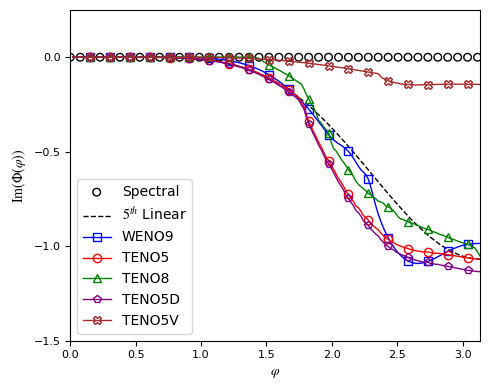

In [4]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(phi_n[::4], np.zeros(int(N / 2) + 1)[::4], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=30, linewidth=linewidth)
imag = results[0][1]
plt.plot(phi_n, imag, linewidth=1, c="black", linestyle="--", label=r"$5^{th}$ Linear")
# imag = results[1][1]
# plt.plot(phi_n, imag, linewidth=1.2, c="brown", linestyle="-.", label=r"$4^{th}$ Central")
# imag = results[2][1]
# plt.plot(phi_n, imag, linewidth=linewidth, c="green", linestyle="-", label=r"TENO5LIN")
colors = ["blue", "red", "green", "purple", "brown", "orange"]
labels = ["WENO9", "TENO5", "TENO8", "TENO5D", "TENO5V", ]
shapes = ["s", "o", "^", "p", "X", "P"]
for i, (_, imag) in enumerate(results[1:]):
    plt.plot(phi_n, imag, linewidth=linewidth, c=colors[i], label=labels[i], marker=shapes[i], markerfacecolor="none", markeredgecolor=colors[i], markersize=6, markeredgewidth=linewidth, markevery=8)
# plt.grid(alpha=0.25)
plt.ylim(-1.5, 0.25)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dissipation")
plt.xlabel(r"$\varphi$", fontsize=label_fontsize)
plt.ylabel(r"$\mathrm{Im}(\Phi(\varphi))$", fontsize=label_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(np.arange(-1.5, 0.25001, 0.5), fontsize=ticks_fontsize)
plt.legend(fontsize=label_fontsize, ncol=1)
plt.tight_layout()
plt.savefig("./dissipation.pdf", dpi=400)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

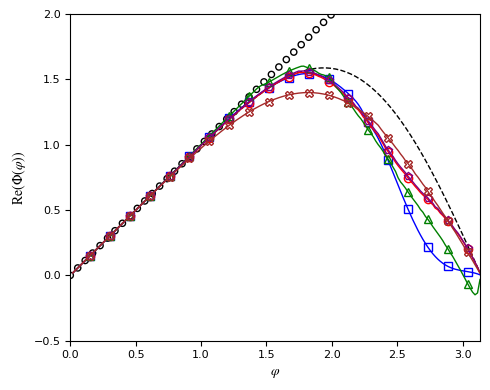

In [5]:
plt.figure(figsize=figsize, dpi=100)
plt.scatter(phi_n[::3], phi_n[::3], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=20, linewidth=linewidth)
real = results[0][0]
plt.plot(phi_n, real, linewidth=1, c="black", linestyle="--", label=r"$5^{th}$ Linear")
# real = results[1][0]
# plt.plot(phi_n, real, linewidth=1.2, c="brown", linestyle="-.", label=r"$4^{th}$ Central")
# real = results[2][0]
# plt.plot(phi_n, real, linewidth=linewidth, linestyle="-", c="blue", label=r"TENO5", marker="s", markerfacecolor="none", markeredgecolor="blue", markevery=5)
# real = results[2][0]
# plt.plot(phi_n, real, linewidth=linewidth, linestyle="-", c="green", label=r"TENO5LIN")
for i, (real, _) in enumerate(results[1:]):
    plt.plot(phi_n, real, linewidth=linewidth, c=colors[i], label=labels[i], marker=shapes[i], markerfacecolor="none", markeredgecolor=colors[i], markersize=6, markeredgewidth=linewidth, markevery=8)
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dispersion")
plt.xlabel(r"$\varphi$", fontsize=label_fontsize)
plt.ylabel(r"$\mathrm{Re}(\Phi(\varphi))$", fontsize=label_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.tight_layout()
# plt.legend(fontsize=label_fontsize, ncol=1)
# plt.grid(alpha=0.25)
plt.savefig("./dispersion.pdf", dpi=400)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


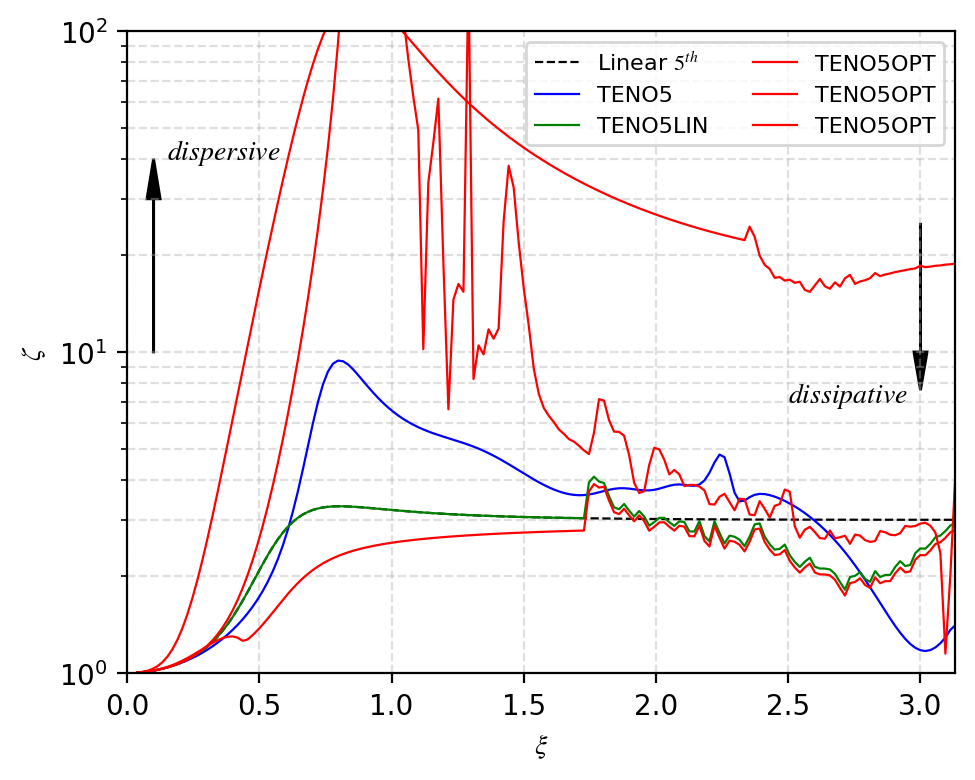

In [6]:
plt.figure(figsize=(5, 4), dpi=200)
# plt.plot(phi_n, errors, linewidth=1.5, c="black", linestyle="--", label=r"Linear $5^{th}$")
errors = (abs(np.gradient(results[0][0], phi_n)-1) + 1e-3)/abs(-results[0][1] + 1e-3)
plt.plot(phi_n, errors, "k--", linewidth=0.8, label=r"Linear $5^{th}$")
errors = (abs(np.gradient(results[1][0], phi_n)-1) + 1e-3)/abs(-results[1][1] + 1e-3)
plt.plot(phi_n, errors, "b-", linewidth=0.8, label=r"TENO5")
errors = (abs(np.gradient(results[2][0], phi_n)-1) + 1e-3)/abs(-results[2][1] + 1e-3)
plt.plot(phi_n, errors, "g-", linewidth=0.8, label=r"TENO5LIN")
for i, (real, imag) in enumerate(results[3:]):
    errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
    plt.plot(phi_n, errors, "r-", linewidth=0.8, label=f"TENO5OPT")
plt.xlim(phi_n[0], phi_n[-1])
plt.ylim(1, 100)
# plt.title("Approximate dispersion-dissipation relation")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid(which="both",alpha=0.4, linestyle="--")
plt.yscale("log")
plt.text(0.15, 40, "$dispersive$")
plt.arrow(0.1, 10, 0, 20, head_width=0.05, head_length=10, color="black")
plt.text(2.5, 7, "$dissipative$")
plt.arrow(3.0, 25, 0, -15, head_width=0.05, head_length=2.4, color="black")

In [7]:
results = []
qs = np.arange(1, 11, 2)
cqs = np.arange(0, 25, 5)
cqs[0] = 1
etas = np.arange(0.1, 0.91, 0.1).round(2)
real_teno5, imag_teno5 = cal_spectral(TENO5(d0=0.6, d1=0.3, d2=0.1, ), 3, [-2, -1, 0, 1, 2])
results.append([real_teno5, imag_teno5])
real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=True), 3, [-2, -1, 0, 1, 2])
results.append([real_weno5, imag_weno5])
real_weno7, imag_weno7 = cal_spectral(WENO7(nonlinear=True), 4, [-3, -2, -1, 0, 1, 2, 3])
results.append([real_weno7, imag_weno7])
real_weno9, imag_weno9 = cal_spectral(WENO9(nonlinear=True), 5, [-4, -3, -2, -1, 0, 1, 2, 3, 4])
results.append([real_weno9, imag_weno9])

/tmp/ipykernel_1956/1123884373.py:31: RuntimeWarning: invalid value encountered in scalar divide
  v_hat.append(temp1 / temp2)


NameError: name 'WENO5' is not defined

In [ ]:
plt.figure(figsize=(5, 4), dpi=200)
plt.scatter(phi_n[::3], np.zeros(int(N / 2) + 1)[::3], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=20, linewidth=linewidth)

colors = ["black", "red", "blue", "green"]
labels = ["TENO5", "WENO5", "WENO7", "WENO9"]
for i, (_, imag) in enumerate(results):
    plt.plot(phi_n, imag, linewidth=linewidth, c=colors[i], label=labels[i])
plt.grid(alpha=0.25)
plt.ylim(-1.5, 0.25)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dissipation")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_I$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(np.arange(-1.5, 0.25001, 0.5), fontsize=ticks_size)
plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
# plt.savefig("/mnt/d/OneDrive/print//dissipation.jpg", dpi=400)

In [ ]:
plt.rcParams["mathtext.fontset"] = "stix"

plt.figure(figsize=figsize, dpi=200)
plt.scatter(phi_n[::2], phi_n[::2], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=20, linewidth=linewidth)
# real = results[0][0]
# plt.plot(phi_n, real, linewidth=linewidth, c="black", linestyle="--", label=r"Linear $5^{th}$")
# real = results[1][0]
# plt.plot(phi_n, real, linewidth=linewidth, linestyle="-", c="blue", label=r"TENO5")
# real = results[2][0]
# plt.plot(phi_n, real, linewidth=linewidth, linestyle="-", c="green", label=r"TENO5LIN")
for i, (real, _) in enumerate(results):
    plt.plot(phi_n, real, linewidth=linewidth, c=colors[i], label=labels[i])
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dispersion")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_R$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
plt.tight_layout()
plt.legend(fontsize=10, ncol=2)
plt.grid(alpha=0.25)
# plt.savefig("/mnt/d/OneDrive/print//dispersion.jpg", dpi=400)

In [ ]:
results = []
qs = np.arange(1, 11, 2)
cqs = np.arange(0, 25, 5)
cqs[0] = 1
etas = np.arange(0.1, 0.91, 0.1).round(2)
real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=False), 3, [-2, -1, 0, 1, 2])
results.append([real_weno5, imag_weno5])
weight_list = []
for cq in cqs:
    cq=cq
    eta = 0.4
    q = 6
    real, imag, weight = cal_spectral_and_weight(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])
    weight_list.append(weight)

In [ ]:
plt.rc("font", family="Times New Roman")
plt.rcParams["mathtext.fontset"] = "stix"

plt.figure(figsize=figsize, dpi=100)
plt.scatter(phi_n[::2], phi_n[::2], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=20, linewidth=linewidth)
real = results[0][0]
plt.plot(phi_n, real, linewidth=linewidth, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (real, _) in enumerate(results[1:]):
    plt.plot(phi_n, real, linewidth=linewidth, label=f"$C={cqs[i]}$")
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dispersion")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_R$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
plt.tight_layout()
plt.legend(fontsize=10, ncol=2)
plt.grid()
# plt.savefig("teno5_dispersion.pdf", dpi=400)

plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(phi_n[::3], np.zeros(int(N / 2) + 1)[::3], marker="o", facecolor="none", edgecolor="black", label="Spectral", alpha=1, s=20, linewidth=linewidth)
imag = results[0][1]
plt.plot(phi_n, imag, linewidth=linewidth, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (_, imag) in enumerate(results[1:]):
    plt.plot(phi_n, imag, linewidth=linewidth, label=f"$C={cqs[i]}$")
plt.grid()
plt.ylim(-1.25, 0.25)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dissipation")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_I$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.tight_layout()
plt.yticks(np.arange(-1.25, 0.25001, 0.3), fontsize=ticks_size)
plt.legend(fontsize=10, ncol=2)
# plt.savefig("teno5_dissipation.pdf", dpi=400)

In [ ]:
plt.rc("font", family="Times New Roman")
plt.rcParams["mathtext.fontset"] = "stix"

markers = ["o", "^", "s", "p", "d"]

plt.figure(figsize=figsize, dpi=100)
plt.plot(phi_n[::2], phi_n[::2], "k-", label="Spectral", linewidth=linewidth)
real = results[0][0]
plt.plot(phi_n, real, linewidth=linewidth, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (real, _) in enumerate(results[1:]):
    plt.plot(phi_n, real, linewidth=linewidth, label=f"$C={cqs[i]}$", marker=markers[i], markersize=6, markevery=6, markerfacecolor="none", markeredgewidth=linewidth)
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dispersion")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_R$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
plt.tight_layout()
plt.legend(fontsize=10, ncol=2)
plt.grid()
plt.savefig("teno5_dispersion.pdf", dpi=400)

plt.figure(figsize=(5, 4), dpi=100)
plt.plot(phi_n[::3], np.zeros(int(N / 2) + 1)[::3], "k-", label="Spectral", linewidth=linewidth)
imag = results[0][1]
plt.plot(phi_n, imag, linewidth=linewidth, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (_, imag) in enumerate(results[1:]):
    plt.plot(phi_n, imag, linewidth=linewidth, label=f"$C={cqs[i]}$", marker=markers[i], markersize=6, markevery=6, markerfacecolor="none", markeredgewidth=linewidth)
plt.grid()
plt.ylim(-1.25, 0.25)
plt.xlim(phi_n[0], phi_n[-1])
# plt.title("Approximate Dissipation")
plt.xlabel(r"$\xi$", fontsize=label_size)
plt.ylabel(r"$\xi_I$", fontsize=label_size)
plt.xticks(fontsize=ticks_size)
plt.tight_layout()
plt.yticks(np.arange(-1.25, 0.25001, 0.3), fontsize=ticks_size)
plt.legend(fontsize=10, ncol=2)
plt.savefig("teno5_dissipation.pdf", dpi=400)

In [ ]:
weight = np.array(weight_list[9])
plt.figure(dpi=100)
plt.imshow(weight, cmap="gray")
plt.colorbar()
weight.min()

In [ ]:
results = []
# real_teno5, imag_teno5 = cal_spectral(TENO5(), 3, [-2, -1, 0, 1, 2])
etas = np.arange(0.2, 0.91, 0.1).round(2)
# real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=False), 3, [-2, -1, 0, 1, 2])
# results.append([real_weno5, imag_weno5])
for eta in etas:
    cq=1
    q=6
    real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq, nonlinear=True), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])

errors = (abs(np.gradient(results[0][0], phi_n)-1) + 1e-3)/(-results[0][1] + 1e-3)

plt.figure(figsize=(5, 4), dpi=200)
# plt.plot(phi_n, errors, linewidth=1.5, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (real, imag) in enumerate(results[:]):
    errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
    plt.plot(phi_n, errors, linewidth=0.8, label=f"$\eta={etas[i]}$")
plt.xlim(phi_n[0], phi_n[-1])
plt.ylim(0.01, 100)
# plt.title("Approximate dispersion-dissipation relation")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()
plt.yscale("log")
plt.text(0.1, 40, "$dispersive$")
plt.arrow(0.1, 5, 0, 20, head_width=0.05, head_length=10, color="black")
plt.text(0.1, 0.02, "$dissipative$")
plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
# plt.show()
# plt.savefig("spectral/nonlinear_eta.jpg")

In [ ]:
path = "abs"
print(id(path))
path2 = path
print(id(path2))
print(id(path + "ads"))

In [ ]:
path = 1
print(id(path))
path2 = path
print(id(path2))
path += 2
print(id(path))

In [ ]:
a = 2
def change(b):
    print(hex(id(b)))
    b = 3
    print(hex(id(b)))
print(hex(id(a)))
change(a)
print(hex(id(a)))

In [ ]:
results = []
# real_teno5, imag_teno5 = cal_spectral(TENO5(), 3, [-2, -1, 0, 1, 2])
etas = np.arange(0.2, 0.91, 0.1).round(2)
# real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=False), 3, [-2, -1, 0, 1, 2])
# results.append([real_weno5, imag_weno5])
cqs = np.arange(0, 25, 5)
cqs[0] = 1
for cq in cqs:
    cq=cq
    q=6
    eta=0.2
    real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])

errors = (abs(np.gradient(results[0][0], phi_n)-1) + 1e-3)/(-results[0][1] + 1e-3)

plt.figure(figsize=(5, 4), dpi=200)
# plt.plot(phi_n, errors, linewidth=1.5, c="black", linestyle="--", label=r"Linear $5^{th}$")
for i, (real, imag) in enumerate(results[:]):
    errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
    plt.plot(phi_n, errors, linewidth=0.4, label=f"$C_q={cqs[i]}$")
plt.xlim(phi_n[0], phi_n[-1])
plt.ylim(0.01, 100)
# plt.title("Approximate dispersion-dissipation relation")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()
plt.yscale("log")
plt.text(0.1, 40, "$dispersive$")
plt.arrow(0.1, 5, 0, 20, head_width=0.05, head_length=10, color="black")
plt.text(0.1, 0.02, "$dissipative$")
plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
# plt.show()
# plt.savefig("spectral/nonlinear_eta.jpg")

In [ ]:
results = []
# cqs = np.arange(1, 20, 5)
cqs = (1, 5, 10, 15, 20, 50)
for cq in cqs:
    cq=cq
    q=6
    eta=0.4
    real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])

In [ ]:
results = []
# cqs = np.arange(1, 20, 5)
cts_power = np.arange(3, 13, 2)
cts = 0.1**cts_power
cts_str = [f"1.e{-power}" for power in cts_power]
for ct in cts:
    cq=1
    q=6
    eta=0.4
    real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq, CT=ct), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])

In [ ]:

plt.figure(figsize=(15, 4), dpi=200)
plt.subplot(1, 3, 1)
plt.plot(phi_n, phi_n, 'k.', label="Spectral", alpha=0.3)
for i, (real, _) in enumerate(results):
    plt.plot(phi_n, real, linewidth=0.8, label=f"$C_T={cts_str[i]}$")
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\xi_R$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(phi_n, np.zeros(int(N / 2) + 1), 'k.', label="Spectral", alpha=0.3)
for i, (_, imag) in enumerate(results):
    plt.plot(phi_n, imag, linewidth=0.8, label=f"$C_T={cts_str[i]}$")
plt.grid()
plt.ylim(-2.5, 0.5)
plt.xlim(phi_n[0], phi_n[-1])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\xi_I$ (dissipation)")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)

plt.subplot(1, 3, 3)
for i, (real, imag) in enumerate(results):
    errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
    plt.plot(phi_n, errors, linewidth=0.8, label=f"$C_T={cts_str[i]}$")
plt.xlim(phi_n[0], phi_n[-1])
plt.ylim(0.5, 10)
# plt.title("Approximate dispersion-dissipation relation")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()
plt.yscale("log")
# plt.yticks(np.arange(1, 10, 3))
# plt.text(0.1, 4, "$dispersive$")
# plt.arrow(0.1, 1.2, 0, 2, head_width=0.05, head_length=2, color="black")
# plt.text(0.1, 0.02, "$dissipative$")
# plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
# plt.show()
# plt.savefig("/media/yiqi/Fengyiqi/TUM/RL/relation.jpg")
# plt.savefig("spectral/effect_of_q.jpg")

In [ ]:
results = []
# cqs = np.arange(1, 20, 5)
cts_power = np.arange(1, 13, 2)
cts = 0.1**cts_power
cts_str = [f"1.e{-power}" for power in cts_power]
etas = np.round(np.arange(0.1, 0.91, 0.1), 2)
for ct in cts:
    cq = 1
    q = 6
    eta = 0.5
    real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq, CT=ct), 3, [-2, -1, 0, 1, 2])
    results.append([real, imag])

In [ ]:
plt.figure(figsize=(15, 4), dpi=200)
plt.subplot(1, 3, 1)
plt.plot(phi_n, phi_n, 'k.', label="Spectral", alpha=0.3)
for i, (real, _) in enumerate(results):
    plt.plot(phi_n, real, linewidth=0.8, label=f"$C_t={cts_str[i]}$")
plt.ylim(-0.5, 2)
plt.xlim(phi_n[0], phi_n[-1])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\xi_R$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(phi_n, np.zeros(int(N / 2) + 1), 'k.', label="Spectral", alpha=0.3)
for i, (_, imag) in enumerate(results):
    plt.plot(phi_n, imag, linewidth=0.8, label=f"$C_t={cts_str[i]}$")
plt.grid()
plt.ylim(-2.5, 0.5)
plt.xlim(phi_n[0], phi_n[-1])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\xi_I$ (dissipation)")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)

plt.subplot(1, 3, 3)
for i, (real, imag) in enumerate(results):
    errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
    plt.plot(phi_n, errors, linewidth=0.8, label=f"$C_t={cts_str[i]}$")
plt.xlim(phi_n[0], phi_n[-1])
plt.ylim(0.01, 100)
# plt.title("Approximate dispersion-dissipation relation")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.tight_layout()
plt.legend(fontsize=8, ncol=2)
plt.grid()
plt.yscale("log")
# plt.yticks(np.arange(1, 10, 3))
# plt.text(0.1, 4, "$dispersive$")
# plt.arrow(0.1, 1.2, 0, 2, head_width=0.05, head_length=2, color="black")
# plt.text(0.1, 0.02, "$dissipative$")
# plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
# plt.show()
# plt.savefig("/media/yiqi/Fengyiqi/TUM/RL/relation.jpg")
# plt.savefig("spectral/effect_of_q.jpg")

In [ ]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

cts_power = np.arange(3, 13, 2)
cts = 0.1**cts_power
cts_str = [f"1.e{-power}" for power in cts_power]

etas = np.round(np.arange(0.1, 0.91, 0.1), 2)
# for ct in cts:
plt.figure(figsize=(15, 4*len(cts)), dpi=200)
q, cq = 6, 1
for i, (ct, ct_str) in enumerate(zip(cts, cts_str)):
    
    results = []
    for _, eta in enumerate(etas):
        real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq, CT=ct), 3, [-2, -1, 0, 1, 2])
        error = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
        results.append([real, imag, error])
        
    plt.subplot(len(cts), 3, 3*i+1)
    plt.plot(phi_n, phi_n, 'k.', label="Spectral", alpha=0.3)
    for j, (real, _, _) in enumerate(results):
        plt.plot(phi_n, real, linewidth=0.8, label=f"$\eta={etas[j]}$")
    plt.title(f"dispersion, $C_T={ct_str}$", fontsize=10)
    plt.ylim(-0.5, 2)
    plt.xlim(phi_n[0], phi_n[-1])
    plt.xlabel(r"$\xi$")
    plt.ylabel(r"$\xi_R$")
    plt.tight_layout()
    plt.legend(fontsize=8, ncol=2)
    plt.grid()

    plt.subplot(len(cts), 3, 3*i+2)
    plt.title(f"dissipation, $C_T={ct_str}$", fontsize=10)
    plt.plot(phi_n, np.zeros(int(N / 2) + 1), 'k.', label="Spectral", alpha=0.3)
    for j, (_, imag, _) in enumerate(results):
        plt.plot(phi_n, imag, linewidth=0.8, label=f"$\eta={etas[j]}$")
    plt.grid()
    plt.ylim(-2.5, 0.5)
    plt.xlim(phi_n[0], phi_n[-1])
    plt.xlabel(r"$\xi$")
    plt.ylabel(r"$\xi_I$")
    plt.tight_layout()
    plt.legend(fontsize=8, ncol=2)

    plt.subplot(len(cts), 3, 3*i+3)
    plt.title(f"ratio, $C_T={ct_str}$", fontsize=10)
    for j, (_, _, errors) in enumerate(results):
        plt.plot(phi_n, errors, linewidth=0.8, label=f"$\eta={etas[j]}$")
    plt.xlim(phi_n[0], phi_n[-1])
    plt.ylim(0.01, 100)
    # plt.title("Approximate dispersion-dissipation relation")
    plt.xlabel(r"$\xi$")
    plt.ylabel(r"$\zeta$")
    plt.tight_layout()
    plt.legend(fontsize=8, ncol=2)
    plt.grid()
    plt.yscale("log")


    # plt.show()
    plt.savefig(f"spectral/ct/spctral_{ct_str}.jpg")
# plt.show()

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
for i, x in enumerate(zip(a, b), 1):
    print(i, x)

In [ ]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=False), 3, [-2, -1, 0, 1, 2])

qs = np.arange(1, 7, 1)
cqs = np.arange(0, 21, 4)
cqs[0] = 1
etas = np.arange(0.1, 1.0, 0.2).round(2)

errors_linear = (abs(np.gradient(real_weno5, phi_n)-1) + 1e-3)/(-imag_weno5 + 1e-3)

plt.figure(figsize=(5*len(cqs), 3*len(qs)), dpi=100)
j = 1
for q in qs:
    for cq in cqs:
        results = []
        plt.subplot(len(qs), len(cqs), j)
        print(f"processing: {format(j / (len(qs) * len(cqs)) * 100, '.2f')}%")
        
        plt.plot(phi_n, errors_linear, linewidth=1.5, c="black", linestyle="--", label=r"Linear $5^{th}$")
        for i, eta in enumerate(etas):
            real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq), 3, [-2, -1, 0, 1, 2])

            errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
            plt.plot(phi_n, errors, linewidth=0.8, label=f"$\eta={etas[i]}$")
            
        plt.title(f"$(q={q}, C_q={cq})$", fontsize=10)
        plt.xlim(phi_n[0], phi_n[-1])
        plt.ylim(0.01, 100)
        plt.xticks(fontsize=4)
        plt.yticks(fontsize=4)
        
        plt.legend(fontsize=8, ncol=2)
        plt.grid()
        plt.yscale("log")
        plt.text(0.1, 40, "$dispersive$")
        plt.arrow(0.1, 5, 0, 20, head_width=0.05, head_length=10, color="black")
        plt.text(0.1, 0.02, "$dissipative$")
        plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
        plt.tight_layout()
        
        j += 1
        clear_output(wait=True)

# plt.savefig(f"spectral/spectral_grid_{str(ct)}_cq.jpg")
# plt.show()

In [ ]:
for i in range(0):
    print(":")

In [ ]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

real_weno5, imag_weno5 = cal_spectral(WENO5(nonlinear=False), 3, [-2, -1, 0, 1, 2])

qs = np.arange(1, 11, 2)
cqs = np.arange(0, 101, 20)
cqs[0] = 1
etas = np.arange(0.1, 1.0, 0.1).round(2)

errors_linear = (abs(np.gradient(real_weno5, phi_n)-1) + 1e-3)/(-imag_weno5 + 1e-3)

power=np.arange(3, 10, 1)
cts = np.array(1/(10**power))

for ct in cts:
    plt.figure(figsize=(5*len(cqs), 3*len(qs)), dpi=100)
    j = 1
    for q in qs:
        for cq in cqs:
            results = []
            plt.subplot(len(qs), len(cqs), j)
            print(f"processing: {format(j / (len(qs) * len(cqs)) * 100, '.2f')}%")

            plt.plot(phi_n, errors_linear, linewidth=1.5, c="black", linestyle="--", label=r"Linear $5^{th}$")
            for i, eta in enumerate(etas):
                real, imag = cal_spectral(TENO5(d0=(2+eta)/4, d1=(1-eta)/2, d2=eta/4, q=q, Cq=cq, CT=ct), 3, [-2, -1, 0, 1, 2])

                errors = (abs(np.gradient(real, phi_n)-1) + 1e-3)/abs(-imag + 1e-3)
                plt.plot(phi_n, errors, linewidth=0.8, label=f"$\eta={etas[i]}$")

            plt.title(f"$(q={q}, C_q={cq})$", fontsize=10)
            plt.xlim(phi_n[0], phi_n[-1])
            plt.ylim(0.01, 100)
            plt.xticks(fontsize=4)
            plt.yticks(fontsize=4)

            plt.legend(fontsize=8, ncol=2)
            plt.grid()
            plt.yscale("log")
            plt.text(0.1, 40, "$dispersive$")
            plt.arrow(0.1, 5, 0, 20, head_width=0.05, head_length=10, color="black")
            plt.text(0.1, 0.02, "$dissipative$")
            plt.arrow(0.1, 0.2, 0, -0.16, head_width=0.05, head_length=0.01, color="black")
            plt.tight_layout()

            j += 1
            clear_output(wait=True)

    # plt.show()
    plt.savefig(f"spectral/spectral_grid_{str(ct)}.jpg")
    plt.show()